# Final Customizable Refactor Deep Consensus Network
- Customize the number of layers and parameters in each layer
- Refactor deep consensus wrapper and fit_generator
- Template Notebook

In [3]:
"""
   A level above configuration are IPython extensions, Python modules which modify 
   the behaviour of the shell. 
   To load an extension while IPython is running, use the %load_ext magic:
   
   %load_ext myextension
   
   
   Reload an IPython extension by its module name.
   
   %reload_ext
   
https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

   Autoreload
   
   IPython extension to reload modules before executing user code.
   autoreload reloads modules automatically before entering the 
   execution of code typed at the IPython prompt.
   
"""

%load_ext autoreload
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.layers import Dense, Activation, AveragePooling2D, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.optimizers import RMSprop, Adadelta, Adam, SGD, Adamax, Adagrad

In [5]:

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [6]:
%cd /content/drive/My\ Drive/DIP

/content/drive/My Drive/DIP


In [7]:
# Import functions to build network and fit generator

from customizable_deep_network import build_network
import fit_generator_helper
import mrc

Using TensorFlow backend.


# Set up data

In [0]:
fname_list = []
label_list=[]
# each directory is associated with a label. there are multiple mrcs files in the directory (only two for now, but probably tens later with more data)
for fname in glob.glob('/content/drive/My Drive/J119/*.mrcs'):
  label_list.append(0)
  fname_list.append(fname)

for fname in glob.glob('/content/drive/My Drive/J123/*.mrcs'):
  label_list.append(1)
  fname_list.append(fname) 
                      

df = fit_generator_helper.parse_files(fname_list,label_list)
df = df.sample(df.shape[0])
header = mrc.read_header(fname_list[0])
nx,ny=header['nx'],header['nx']
val_n = int(0.1*df.shape[0]) # 10%/90% test/train split
df = df.iloc[:-val_n]
df_val = df.iloc[-val_n:]

In [9]:
X_val,Y_val = fit_generator_helper.XY_from_df_batch(df_val,nx=nx,ny=ny,crop_n=400) # can crop to full frame (ie no cropping)
X_val.shape

(200, 400, 400, 1)

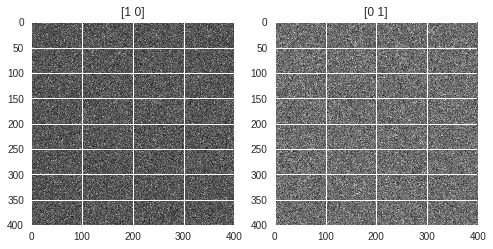

In [10]:
X,Y = X_val,Y_val

# first index of different labels (shuffled up)
i=np.argwhere((Y_val[:10]==np.array([1,0])).mean(1) == 1).flatten()[0]
j=np.argwhere((Y_val[:10]==np.array([0,1])).mean(1) == 1).flatten()[0]

fig = plt.figure()
a = fig.add_subplot(121)
a.set_title('%s' % Y[i])
plt.imshow(X[i,:,:,0],cmap='gray')

a = fig.add_subplot(122)
a.set_title('%s' % Y[j])
plt.imshow(X[j,:,:,0],cmap='gray')


# Build model

User can customize number of layers and parameters for building a Deep Learning network

In [0]:
# Definition of paramaters depending of the number of layers

blocks = 7 # Each block has 5 layers = 2 Conv2D + 1 Activation + 1 Normalization + 1 Pooling


""" k1_size = Kernel size of the first Conv2D layer
    K2_size = Kernel size of the second Conv2D layer
    pool1 = max pooling size
"""


#inputl_kernel = [k1_size,k2_size]
"""Represents the kernel size of the first layer of the network or call input layer"""
inputl_kernel = [15,15]

#inputl_node =  [node1_number, node2_number]
"""Represents the number of node that each CONV2D layer has in the first layer"""
inputl_node = [8,8]

#hiddenl_kernel = [k3_size, k4_size, k5_size,k6_size,...] # Depends on the number of layers
"""Represents the kernel size of the hidden layers of the network"""
hiddenl_kernel = [11, 11, 7, 7,5,5,3,3]

# hiddenl_node = [node3_number, node4_number, node5_number, node6_number,...] # Depends on the number of layers
"""Represents the number of node that each CONV2D layer has in the hidden layers"""
hiddenl_node = [8,16,32,32,32,32,32,32]

# pooling_size = [pool1_size, pool2_size, pool3_size, ...] # Depends on the number of layers
"""Represents the size of pooling layer in the input and hidden layer"""
pooling_size = [11,9,7,3,3]


# Penultimate Block
# av_pool = [node1_number, node2_number, k1_size, k2_size, av_pool_size]
#average_pool= [64, 64, 3, 3, 4]
n1_ave_pool = 64
n2_ave_pool = 64
k1_ave_pool = 3
k2_ave_pool = 3 
av_pool = 4

# Output Layer = Full connected network
# output_layer = [val_dense, drop]
#output_layer = [512, 0.75]
val_dense = 64
drop = 0.5


In [12]:
# Define input shape and number of classes

input_shape=X.shape[1::]
n_classes = 2

# Call function build_network

model = build_network (blocks,input_shape, inputl_node,inputl_kernel,hiddenl_node,
                     hiddenl_kernel, pooling_size, n1_ave_pool, n2_ave_pool, 
                     k1_ave_pool, k2_ave_pool, av_pool, val_dense, drop, n_classes)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
# Print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 400, 400, 8)       1808      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 400, 400, 8)       14408     
_________________________________________________________________
activation_1 (Activation)    (None, 400, 400, 8)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 400, 400, 8)       32        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 200, 200, 8)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 200, 200, 8)       7752      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 200, 200, 16)      15504     
__________

# Train model

In [0]:
batch_size = 25
steps_per_epoch = np.floor(df.shape[0] / batch_size) # 110 for 11k particles

In [0]:
# Compile Model
# Select optimizer, loss,and metrics
model.compile(optimizer = SGD() , loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [19]:
for _ in range(1):
    model.fit_generator(fit_generator_helper.image_loader(df,batch_size=batch_size,nx=nx,ny=ny,crop_n=400),
                    steps_per_epoch=steps_per_epoch, # steps_per_epoch is number of batches per epoch
                    epochs=1,
                   )
    scores = model.evaluate(X_val, Y_val)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
200/200 [==============================] - 5s 23ms/step
categorical_accuracy: 54.00%


# Tune Dense Layer

In [20]:
n_epochs = 8 # change this to how many epochs it takes to fit

for val_dense in [64,128,256]:
    print(val_dense)
    model_val_dense = build_network(blocks,input_shape, inputl_node,inputl_kernel,hiddenl_node,
                     hiddenl_kernel, pooling_size, n1_ave_pool, n2_ave_pool, 
                     k1_ave_pool, k2_ave_pool, av_pool, val_dense, drop, n_classes)
    
    model_val_dense.compile(optimizer = SGD() , loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    for _ in range(n_epochs):
        model_val_dense.fit_generator(fit_generator_helper.image_loader(df,batch_size=batch_size,nx=nx,ny=ny,crop_n=400),
                        steps_per_epoch=steps_per_epoch, # steps_per_epoch is number of batches per epoch
                        epochs=1,
                       )
        scores = model_val_dense.evaluate(X_val, Y_val)
        print("%s: %.2f%%" % (model_val_dense.metrics_names[1], scores[1] * 100))
    
    

64
Epoch 1/1
200/200 [==============================] - 2s 11ms/step
categorical_accuracy: 42.50%
Epoch 1/1
200/200 [==============================] - 2s 10ms/step
categorical_accuracy: 53.50%
Epoch 1/1
200/200 [==============================] - 2s 10ms/step
categorical_accuracy: 55.50%
Epoch 1/1
200/200 [==============================] - 2s 10ms/step
categorical_accuracy: 56.50%
Epoch 1/1
200/200 [==============================] - 2s 10ms/step
categorical_accuracy: 57.00%
Epoch 1/1
200/200 [==============================] - 2s 10ms/step
categorical_accuracy: 57.00%
Epoch 1/1
200/200 [==============================] - 2s 10ms/step
categorical_accuracy: 57.00%
Epoch 1/1
200/200 [==============================] - 2s 10ms/step
categorical_accuracy: 57.00%
128
Epoch 1/1
200/200 [==============================] - 2s 11ms/step
categorical_accuracy: 45.50%
Epoch 1/1
200/200 [==============================] - 2s 10ms/step
categorical_accuracy: 57.00%
Epoch 1/1
200/200 [========================